In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [357]:
df = pd.read_csv("Churn_Modelling.csv")

In [358]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [359]:
df_new = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [360]:
df_new.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [361]:
df_new["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [362]:
df_new["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [363]:
def to_categorical(df):
    dummy_geo = pd.get_dummies(df["Geography"])
    df = pd.concat([df, dummy_geo], axis=1)
    df = df.drop(["Geography"], axis=1)
    
    dummy_gender = pd.get_dummies(df["Gender"])
    df= pd.concat([df, dummy_gender], axis=1)
    df = df.drop(["Gender"], axis=1)
    return df

df_new = to_categorical(df_new)
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [364]:
def process_age(df):
    bins = np.array([18, 26, 35, 44, 53, 62, 71, 80, 95])
    labels = [i+1 for i in range(8)]
    df["age_label"] = pd.cut(df["Age"], bins, labels)
    df["age_label"] = pd.cut(df["Age"], bins=bins, labels=labels).cat.add_categories([0]).fillna(0)
    df = df.drop(["Age"], axis=1)
    
    return df
    
df_new = process_age(df_new)
df_new.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,age_label
0,619,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,3
1,608,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,3
2,502,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,3
3,699,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,3
4,850,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,3


把資料分成三份，遇到資料不平均的情形，需要調整資料比例

In [335]:
df_new["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [340]:
# def split_data(df):
#     df_1 = df[df["Exited"]==1]
#     df_0 = df[df["Exited"]==0]
    
#     df_0_test = df_0.sample(n=400, random_state=200)
#     df_1_test = df_1.sample(n=400, random_state=200)
    
#     df_0_valid = df_0_test[:200]
#     df_0_test = df_0_test[200:]
#     df_1_valid = df_1_test[:200]
#     df_1_test = df_1_test[200:]
    
#     df_0_train = df_0.drop(df_0_valid.index)
#     df_0_train = df_0_train.drop(df_0_test.index)
#     df_1_train = df_1.drop(df_1_valid.index)
#     df_1_train = df_1_train.drop(df_1_test.index)
    
#     df_train = pd.concat([df_0_train, df_1_train], axis=0)
#     df_valid = pd.concat([df_0_valid, df_1_valid], axis=0)
#     df_test = pd.concat([df_0_test, df_1_test], axis=0)
    
#     print(df_train.shape)
#     print(df_valid.shape)
#     print(df_test.shape)
#     return df_train, df_valid, df_test

In [365]:
def split_data(df):
    df_1 = df[df["Exited"]==1]
    df_0 = df[df["Exited"]==0]
    
    df_0_random = df_0.sample(n=2037, random_state=200)
    df_0_test = df_0_random.sample(n=400, random_state=200)
    df_1_test = df_1.sample(n=400, random_state=200)
    
    df_0_valid = df_0_test[:200]
    df_0_test = df_0_test[200:]
    df_1_valid = df_1_test[:200]
    df_1_test = df_1_test[200:]
    
    df_0_train = df_0_random.drop(df_0_valid.index)
    df_0_train = df_0_train.drop(df_0_test.index)
    df_1_train = df_1.drop(df_1_valid.index)
    df_1_train = df_1_train.drop(df_1_test.index)
    
    df_train = pd.concat([df_0_train, df_1_train], axis=0)
    df_valid = pd.concat([df_0_valid, df_1_valid], axis=0)
    df_test = pd.concat([df_0_test, df_1_test], axis=0)
    
    print(df_train.shape)
    print(df_valid.shape)
    print(df_test.shape)
    return df_train, df_valid, df_test

In [366]:
df_train, df_valid, df_test = split_data(df_new)

(3274, 14)
(400, 14)
(400, 14)


In [367]:
df_train["age_label"] = df_train["age_label"].astype('int')
df_valid["age_label"] = df_valid["age_label"].astype('int')
df_test["age_label"] = df_test["age_label"].astype('int')

In [368]:
# CreditScore, Tenure, Balance, EstimatedSalary
from scipy import stats

def normalize_data(df_train, df_valid, df_test):
    df_train["CreditScore"] = stats.zscore(df_train["CreditScore"])
    df_train["Tenure"] = df_train["Tenure"] / 10
    df_train["Balance"] = stats.zscore(df_train["Balance"])
    df_train["EstimatedSalary"] = stats.zscore(df_train["EstimatedSalary"])
    df_train["age_label"] = df_train["age_label"]/8
    df_train["NumOfProducts"] = df_train["NumOfProducts"]/4
    
    df_valid["CreditScore"] = stats.zscore(df_valid["CreditScore"])
    df_valid["Tenure"] = df_valid["Tenure"] / 10
    df_valid["Balance"] = stats.zscore(df_valid["Balance"])
    df_valid["EstimatedSalary"] = stats.zscore(df_valid["EstimatedSalary"])
    df_valid["age_label"] = df_valid["age_label"]/8
    df_valid["NumOfProducts"] = df_valid["NumOfProducts"]/4
    
    df_test["CreditScore"] = stats.zscore(df_test["CreditScore"])
    df_test["Tenure"] = df_test["Tenure"] / 10
    df_test["Balance"] = stats.zscore(df_test["Balance"])
    df_test["EstimatedSalary"] = stats.zscore(df_test["EstimatedSalary"])
    df_test["age_label"] = df_test["age_label"]/8
    df_test["NumOfProducts"] = df_test["NumOfProducts"]/4
    
    y_train = df_train["Exited"]
    x_train = df_train.drop(["Exited"], axis=1)
    y_valid = df_valid["Exited"]
    x_valid = df_valid.drop(["Exited"], axis=1)
    y_test = df_test["Exited"]
    x_test = df_test.drop(["Exited"], axis=1)
    
    return x_train, y_train, x_valid, y_valid, x_test, y_test

x_train, y_train, x_valid, y_valid, x_test, y_test = normalize_data(df_train, df_valid, df_test)

In [392]:
print(y_train.shape)

(3274,)


In [344]:
x_train.head(20)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,age_label
1,-0.438170,0.1,0.119131,0.25,0,1,0.219418,0,0,1,1,0,0.375
3,0.505554,0.1,-1.221945,0.50,0,0,-0.105698,1,0,0,1,0,0.375
4,2.071515,0.2,0.786453,0.25,1,1,-0.361791,0,0,1,1,0,0.375
6,1.781138,0.7,-1.221945,0.50,1,1,-1.560764,1,0,0,0,1,0.500
8,-1.547824,0.4,1.051127,0.50,0,1,-0.433770,1,0,0,0,1,0.375
9,0.349995,0.2,0.931958,0.25,1,1,-0.489614,1,0,0,0,1,0.250
10,-1.267818,0.6,0.410505,0.50,0,0,-0.342735,1,0,0,0,1,0.250
11,-1.589307,0.3,-1.221945,0.50,1,0,-0.408591,0,0,1,0,1,0.125
12,-1.807089,1.0,-1.221945,0.50,1,0,-1.279384,1,0,0,1,0,0.250
13,-1.050035,0.5,-1.221945,0.50,0,0,1.579835,1,0,0,1,0,0.125


模型訓練

In [369]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


Decision Tree

In [370]:
clfd = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
clfd = clfd.fit(x_train, y_train)

predict_d_train = clfd.predict(x_train)
print("Train正確率: ", accuracy_score(y_train, predict_d_train) * 100, "%")

predict_d_valid = clfd.predict(x_valid)
print("Valid正確率: ", accuracy_score(y_valid, predict_d_valid) * 100, "%")

predict_d_test = clfd.predict(x_test)
print("Test正確率: ", accuracy_score(y_test, predict_d_test) * 100, "%")

Train正確率:  82.86499694563226 %
Valid正確率:  70.25 %
Test正確率:  75.5 %


              precision    recall  f1-score   support

           0       0.72      0.84      0.77       200
           1       0.81      0.67      0.73       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.76      0.75       400



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


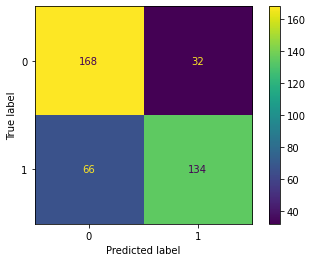

In [371]:
print(classification_report(y_test, predict_d_test))
plot_confusion_matrix(clfd, x_test, y_test)

<AxesSubplot:>

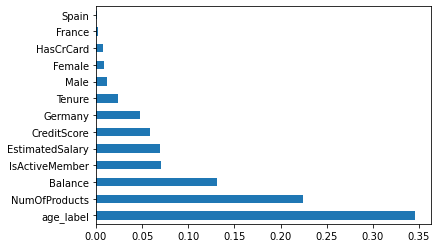

In [372]:
feat_importances = pd.Series(clfd.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

Random Forest

In [373]:
clfr = RandomForestClassifier(n_estimators=100, max_depth=10)

clfr = clfr.fit(x_train, y_train)

predict_r_train = clfr.predict(x_train)
print("Train正確率: ", accuracy_score(y_train, predict_r_train) * 100, "%")

predict_r_valid = clfr.predict(x_valid)
print("Valid正確率: ", accuracy_score(y_valid, predict_r_valid) * 100, "%")

predict_r_test = clfr.predict(x_test)
print("Test正確率: ", accuracy_score(y_test, predict_r_test) * 100, "%")

Train正確率:  91.53940134392181 %
Valid正確率:  76.0 %
Test正確率:  77.75 %


              precision    recall  f1-score   support

           0       0.74      0.85      0.79       200
           1       0.82      0.70      0.76       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


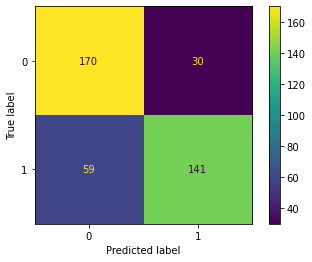

In [374]:
print(classification_report(y_test, predict_r_test))
plot_confusion_matrix(clfr, x_test, y_test)

<AxesSubplot:>

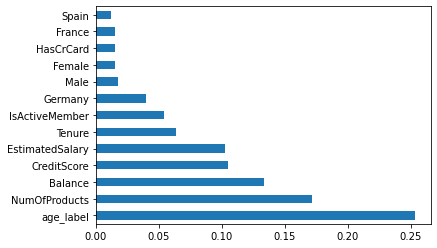

In [375]:
feat_importances = pd.Series(clfr.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

Gradient Boosting

Train正確率:  88.72938301771534 %
Valid正確率:  75.25 %
Test正確率:  77.5 %
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       200
           1       0.79      0.75      0.77       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.78      0.77       400



C:\Users\Wilfred\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


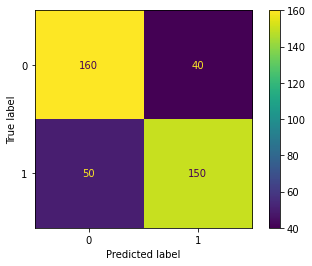

In [376]:
clfg = GradientBoostingClassifier(n_estimators=100, max_depth=5)
clfg.fit(x_train, y_train)

predict_g_train = clfg.predict(x_train)
print("Train正確率: ", accuracy_score(y_train, predict_g_train) * 100, "%")
predict_g_valid = clfg.predict(x_valid)
print("Valid正確率: ", accuracy_score(y_valid, predict_g_valid) * 100, "%")
predict_g_test = clfg.predict(x_test)
print("Test正確率: ", accuracy_score(y_test, predict_g_test) * 100, "%")

print(classification_report(y_test, predict_g_test))
plot_confusion_matrix(clfg, x_test, y_test)

<AxesSubplot:>

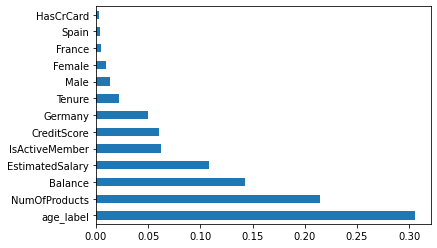

In [377]:
feat_importances = pd.Series(clfg.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

ROC Curve

In [378]:
p1 = clfd.predict_proba(x_test)
p2 = clfr.predict_proba(x_test)
p3 = clfg.predict_proba(x_test)

In [379]:
auc_score_1 = roc_auc_score(y_test, p1[:, 1])
auc_score_2 = roc_auc_score(y_test, p2[:, 1])
auc_score_3 = roc_auc_score(y_test, p3[:, 1])

In [380]:
print(auc_score_1, auc_score_2, auc_score_3)

0.8143500000000001 0.8581749999999999 0.8657499999999999


In [381]:
fpr_1, tpr_1, _ = roc_curve(y_test, p1[:, 1], pos_label=1)
fpr_2, tpr_2, _ = roc_curve(y_test, p2[:, 1], pos_label=1)
fpr_3, tpr_3, _ = roc_curve(y_test, p3[:, 1], pos_label=1)

In [382]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(p_fpr, p_tpr)

[0. 1.] [0. 1.]


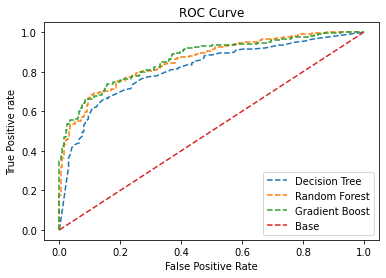

In [383]:
plt.plot(fpr_1, tpr_1, linestyle='--', label='Decision Tree')
plt.plot(fpr_2, tpr_2, linestyle='--', label='Random Forest')
plt.plot(fpr_3, tpr_3, linestyle='--', label='Gradient Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', label='Base')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()